# Lab 7: Dynamic Programming

Lab associated with Module 7: Dynamic Programming

***

In [13]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\benny\AppData\Local\Temp\ipykernel_31916\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [14]:
import numpy as np

In [15]:
import math

In [16]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### <font color='red'> Activity 1: You are running up a staircase with a total of n steps. You can hop either 1 step, 2 steps or 3 steps at at time. Write a DP program to determine how many possible ways you can run up the stairs? (Hint: Start with a recursive solution, and then later move to top-down approach of DP). </font>

### Solution: The recurrance relationship effectively solves the problem(sub-problem) for the last step. The number of ways to reach the last step is the sum of the number of ways to reach the last 3 steps. The base cases are the number of ways to reach the first 3 steps.
### We only look upto n-3 solutions because we are only allowed to hop at most 3 stgeps at a time.

### Complexity for the recursive solution is O(3^n) because we are calling the function 3 times for each step.
### Complexity for the DP solution is O(n) because we are only calling the function n times.


Recursive Test 20 steps
121415
Time:  0.018002986907958984

Recursive Test 30 steps
53798080
Time:  8.13035535812378

Recursive Test 32 step
181997601
Time:  27.476238012313843

Memoization Test 20 steps
121415
Time:  0.0010020732879638672

Memoization Test 30 steps
53798080
Time:  0.20764422416687012

Memoization Test 32 steps
181997601
Time:  0.6901979446411133


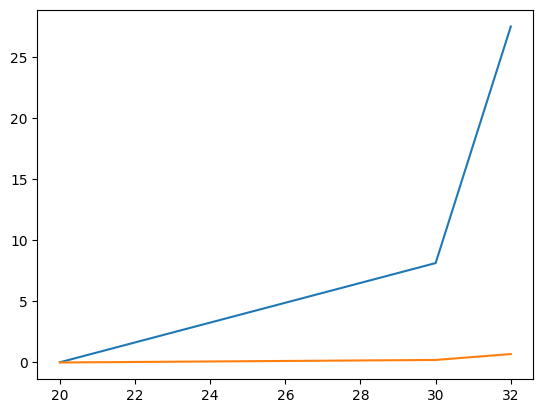

In [9]:
# import time
from time import time

def Recursive_Stairs(n):
    """Recursive version of Stairs. No Memoization"""
    """Args: n: number of stairs"""
    """Returns: number of ways to climb n stairs"""

    # Base cases
    if n < 0:
        return 0
    elif n == 0:
        return 1
    else:
        # Recursively call the function
        return Recursive_Stairs(n-1) + Recursive_Stairs(n-2) + Recursive_Stairs(n-3)

print("\nRecursive Test 20 steps")
# start time
start1 = time()
print(Recursive_Stairs(20))
# end time
end1 = time()
print("Time: ", end1 - start1)
print("\nRecursive Test 30 steps")
# start time
start2 = time()
print(Recursive_Stairs(30))
# end time
end2 = time()
print("Time: ", end2 - start2)
print("\nRecursive Test 32 step")
# start time
start3 = time()
print(Recursive_Stairs(32))
# end time
end3 = time()
print("Time: ", end3 - start3)


def Memo_Stairs(n):
    """Memoization version of Recursive_Stairs"""
    """Args: n: number of stairs"""
    """Returns: number of ways to climb n stairs"""

    # Create a memo list
    memo = [0] * (n+1)
    return Memo_Stairs_Helper(n, memo)

def Memo_Stairs_Helper(n, memo):
    """Helper function for Memo_Stairs"""
    """Args: n: number of stairs"""
    """Retruns: memo: list of memoized values"""
    # Base cases
    if n < 0:
        return 0
    elif n == 0:
        return 1
    # If the value is already in the memo, return it
    elif n in memo:
        return memo[n]
    else:
        # Recursively call the helper function
        # Add the result to the memo
        memo[n] = Memo_Stairs_Helper(n-1, memo) + Memo_Stairs_Helper(n-2, memo) + Memo_Stairs_Helper(n-3, memo)
        return memo[n]

print("\nMemoization Test 20 steps")
start4 = time()
print(Memo_Stairs(20))
end4 = time()
print("Time: ", end4 - start4)
print("\nMemoization Test 30 steps")
start5 = time()
print(Memo_Stairs(30))
end5 = time()
print("Time: ", end5 - start5)
print("\nMemoization Test 32 steps")
start6 = time()
print(Memo_Stairs(32))
end6 = time()
print("Time: ", end6 - start6)

# plot the time difference between the two functions
from matplotlib import pyplot as plt
# x axis is the number of steps
# y axis is the time
plot_x = [20, 30, 32]
plot_y1 = [end1 - start1, end2 - start2, end3 - start3]
plot_y2 = [end4 - start4, end5 - start5, end6 - start6]
plt.plot(plot_x, plot_y1, label = "Recursive")  
plt.plot(plot_x, plot_y2, label = "Memoization")

### <font color='red'> Activity 2: Write the code for finding the Longest Common Sub-sequence. Make sure you output the Matrix C and the longest sub-sequence as well. Test your code with various use-cases. </font>

![Recursive Formula](recursive-formula.png)

### Complexity for the Longest Common Subsequence is O(mn) because we are iterating through the entire matrix.

In [18]:
import itertools
def Longest_SS(X, Y):
    """Longest subsequence of X and Y"""
    """Args: X and Y are strings"""
    """Returns: the longest subsequence of X and Y"""

    # Initialize the matrix to the length of the strings
    C = [[0 for _ in range(len(Y)+1)] for _ in range(len(X)+1)]
    # Initialize the first row and column to 0
    for i in range(len(X)+1):
        C[i][0] = 0
    for j in range(len(Y)+1):
        C[0][j] = 0

    # Recursive solution
    for i, j in itertools.product(range(1, len(X)+1), range(1, len(Y)+1)):
        # Either update the matrix or choose from a value that we have already computed
        C[i][j] = C[i-1][j-1] + 1 if X[i-1] == Y[j-1] else max(C[i-1][j], C[i][j-1])
    
    # Backtrack to find the subsequence
    # Start at the bottom right corner of the matrix
    i, j = len(X), len(Y)
    subseq = []
    while i > 0 and j > 0:
        # Move diagonally if the characters match
        if X[i-1] == Y[j-1]:
            subseq.append(X[i-1])
            i -= 1
            j -= 1
        # Otherwise, move in the direction of the larger value
        elif C[i-1][j] > C[i][j-1]:
            i -= 1
        else:
            j -= 1

    print(''.join(reversed(subseq)))

    for row in C:
        print(row)

    return ''.join(reversed(subseq))

In [19]:
import unittest

class TestLongestSS(unittest.TestCase):
    def test_Longest_SS(self):
        # Test case 1: X and Y have no common subsequence
        X = "ABC"
        Y = "DEF"
        expected_output = ""
        print("\nTest case 1: X and Y have no common subsequence")
        self.assertEqual(Longest_SS(X, Y), expected_output)

        # Test case 2: X and Y have a common subsequence of length 1
        X = "ABC"
        Y = "BCD"
        expected_output = "BC"
        print("\nTest case 2: X and Y have a common subsequence of length 2")
        self.assertEqual(Longest_SS(X, Y), expected_output)

        # Test case 3: X and Y have a common subsequence of length 3
        X = "ABCBDAB"
        Y = "BDCAB"
        expected_output = "BDAB"
        print("\nTest case 3: X and Y have a common subsequence of length 4")
        self.assertEqual(Longest_SS(X, Y), expected_output)

        # Test case 4: X and Y are identical
        X = "ABC"
        Y = "ABC"
        expected_output = "ABC"
        print("\nTest case 4: X and Y are identical and have a comm length 3")
        self.assertEqual(Longest_SS(X, Y), expected_output)

        # Test case 5: X and Y have different lengths
        X = "ABC"
        Y = "ABCD"
        expected_output = "ABC"
        print("\nTest case 5: X and Y have different lengths and the subsequence has length 3")
        self.assertEqual(Longest_SS(X, Y), expected_output)

# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestLongestSS)

# Run the test suite and print the results
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

test_Longest_SS (__main__.TestLongestSS.test_Longest_SS) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK



Test case 1: X and Y have no common subsequence

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]

Test case 2: X and Y have a common subsequence of length 2
BC
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 1, 1, 1]
[0, 1, 2, 2]

Test case 3: X and Y have a common subsequence of length 4
BDAB
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1]
[0, 1, 1, 1, 1, 2]
[0, 1, 1, 2, 2, 2]
[0, 1, 1, 2, 2, 3]
[0, 1, 2, 2, 2, 3]
[0, 1, 2, 2, 3, 3]
[0, 1, 2, 2, 3, 4]

Test case 4: X and Y are identical and have a comm length 3
ABC
[0, 0, 0, 0]
[0, 1, 1, 1]
[0, 1, 2, 2]
[0, 1, 2, 3]

Test case 5: X and Y have different lengths and the subsequence has length 3
ABC
[0, 0, 0, 0, 0]
[0, 1, 1, 1, 1]
[0, 1, 2, 2, 2]
[0, 1, 2, 3, 3]


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

***

### Section 2: Unbounded Knapsack Problem

### Complexity for the Unbounded Knapsack Problem is O(nW) because we are iterating through the entire matrix.

In [20]:
def unboundedKnapsack(W, n, wt, vals, names):
    """ Input: W: maximum weight
                n: number of items
                wt: list of weights
                vals: list of values
                names: list of names
        Output: K[W]: maximum value
                ITEMS[W]: list of items
    """
 
    K = [0 for _ in range(W + 1)]
    ITEMS = [[] for _ in range(W + 1)]

    for x in range(1, W + 1):
        K[x] = 0
        for i in range(1, n):

            prev_k = K[x]

            if (wt[i] <= x):
                K[x] = max(K[x], K[x - wt[i]] + vals[i])

            if K[x] != prev_k:
                ITEMS[x] = ITEMS[x - wt[i]] + names[i]


    return K[W], ITEMS[W]

In [21]:
W = 4
wt = [1, 2, 3]
vals = [1, 4, 6]
names = [["Turtle"], ["Globe"], ["WaterMelon"]]

n = len(names)

print(f'We have {n} items')                

We have 3 items


In [22]:
K, ITEMS = unboundedKnapsack(W, n, wt, vals, names)

In [23]:
ITEMS

['Globe', 'Globe']

***

### <font color='red'> Activity 3: In the earlier activity, you analysed the code for unbounded knapsack. Based on the algorithm discussed in this section, implement a solution to do 0/1 Knapsack. Make sure you test your algorithms for various test-cases. </font>

### Complexity for the 0/1 Knapsack Problem is O(nW) because we are iterating through the entire matrix.

In [24]:
import itertools
def Zero_One_Knapsack(n, wt, vals, W):
    """ Input: W: maximum weight
                n: number of items
                wt: list of weights
                vals: list of values
        Output: K[W]: maximum value
    """
    # make a matrix of size W+1 x n+1
    K = [["." for _ in range(W+1)] for _ in range(n+1)]
    # initialize the first row and column to 0
    for i in range(n+1):
        K[i][0] = 0
    for j in range(W+1):
        K[0][j] = 0
    # fill in the rest of the matrix
    for i, w in itertools.product(range(1, n+1), range(1, W+1)):
        K[i][w] = (
            max(vals[i - 1] + K[i - 1][w - wt[i - 1]], K[i - 1][w])
            if wt[i - 1] <= w
            else K[i - 1][w]
        )
    # print the matrix
    for row in K:
        print(row)
    # return the last element of the matrix
    return K[n][w]

In [25]:
import unittest

class TestZeroOneKnapsack(unittest.TestCase):
    
    def test_small_values(self):
        W = 5
        wt = [2, 3, 4]
        vals = [3, 4, 5]
        expected_output = 7
        print("\nTest 1 - Small Values")
        self.assertEqual(Zero_One_Knapsack(len(vals), wt, vals, W), expected_output)
        
    def test_repeated_weights(self):
        W = 7
        wt = [2, 3, 3, 4]
        vals = [3, 4, 5, 6]
        expected_output = 11
        print("\nTest 2 - Repeated Weights")
        self.assertEqual(Zero_One_Knapsack(len(vals), wt, vals, W), expected_output)
        
    def test_same_weight(self):
        W = 10
        wt = [5, 5, 5, 5]
        vals = [10, 20, 30, 40]
        expected_output = 70
        print("\nTest 3 - Same Weight")
        self.assertEqual(Zero_One_Knapsack(len(vals), wt, vals, W), expected_output)
        
    def test_same_value(self):
        W = 8
        wt = [2, 3, 4, 5]
        vals = [5, 5, 5, 5]
        expected_output = 10
        print("\nTest 4 - Same Value")
        self.assertEqual(Zero_One_Knapsack(len(vals), wt, vals, W), expected_output)
        
    def test_single_item(self):
        W = 3
        wt = [2]
        vals = [4]
        expected_output = 4
        print("\nTest 5 - Single Item")
        self.assertEqual(Zero_One_Knapsack(len(vals), wt, vals, W), expected_output)

# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestZeroOneKnapsack)

# Run the test suite and print the results
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

test_repeated_weights (__main__.TestZeroOneKnapsack.test_repeated_weights) ... ok
test_same_value (__main__.TestZeroOneKnapsack.test_same_value) ... 


Test 2 - Repeated Weights
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 3, 3, 3, 3]
[0, 0, 3, 4, 4, 7, 7, 7]
[0, 0, 3, 5, 5, 8, 9, 9]
[0, 0, 3, 5, 6, 8, 9, 11]


ok
test_same_weight (__main__.TestZeroOneKnapsack.test_same_weight) ... ok
test_single_item (__main__.TestZeroOneKnapsack.test_single_item) ... ok
test_small_values (__main__.TestZeroOneKnapsack.test_small_values) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.134s

OK



Test 4 - Same Value
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 5, 5, 5, 5, 5, 5]
[0, 0, 5, 5, 5, 10, 10, 10, 10]
[0, 0, 5, 5, 5, 10, 10, 10, 10]
[0, 0, 5, 5, 5, 10, 10, 10, 10]

Test 3 - Same Weight
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10]
[0, 0, 0, 0, 0, 20, 20, 20, 20, 20, 30]
[0, 0, 0, 0, 0, 30, 30, 30, 30, 30, 50]
[0, 0, 0, 0, 0, 40, 40, 40, 40, 40, 70]

Test 5 - Single Item
[0, 0, 0, 0]
[0, 0, 4, 4]

Test 1 - Small Values
[0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 3, 3]
[0, 0, 3, 4, 4, 7]
[0, 0, 3, 4, 5, 7]


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

### Different style of testing

In [26]:
def test_Zero_One_Knapsack():
    test_cases = [
        ((5, [2, 3, 4], [3, 4, 5]), 7),
        ((7, [2, 3, 3, 4], [3, 4, 5, 6]), 11),
        ((10, [5, 5, 5, 5], [10, 20, 30, 40]), 70),
        ((8, [2, 3, 4, 5], [5, 5, 5, 5]), 10),
        ((3, [2], [4]), 4)
    ]
    
    for i, ((W, wt, vals), expected) in enumerate(test_cases):
        result = Zero_One_Knapsack(len(vals), wt, vals, W)
        assert result == expected, f"Test case {i} failed: expected {expected}, got {result}"
        print(f"Test case {i} passed\n")

test_Zero_One_Knapsack()


[0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 3, 3]
[0, 0, 3, 4, 4, 7]
[0, 0, 3, 4, 5, 7]
Test case 0 passed

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 3, 3, 3, 3]
[0, 0, 3, 4, 4, 7, 7, 7]
[0, 0, 3, 5, 5, 8, 9, 9]
[0, 0, 3, 5, 6, 8, 9, 11]
Test case 1 passed

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10]
[0, 0, 0, 0, 0, 20, 20, 20, 20, 20, 30]
[0, 0, 0, 0, 0, 30, 30, 30, 30, 30, 50]
[0, 0, 0, 0, 0, 40, 40, 40, 40, 40, 70]
Test case 2 passed

[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 5, 5, 5, 5, 5, 5]
[0, 0, 5, 5, 5, 10, 10, 10, 10]
[0, 0, 5, 5, 5, 10, 10, 10, 10]
[0, 0, 5, 5, 5, 10, 10, 10, 10]
Test case 3 passed

[0, 0, 0, 0]
[0, 0, 4, 4]
Test case 4 passed



### Ask Kiran about pros and cons for each testing style